In [ ]:
!gsutil -m cp \
  "gs://nutrition5k_dataset/nutrition5k_dataset/imagery/realsense_overhead/dish_1556573514/depth_color.png" \
  "gs://nutrition5k_dataset/nutrition5k_dataset/imagery/realsense_overhead/dish_1556573514/depth_raw.png" \
  "gs://nutrition5k_dataset/nutrition5k_dataset/imagery/realsense_overhead/dish_1556573514/rgb.png" \
  .


Copying gs://nutrition5k_dataset/nutrition5k_dataset/imagery/realsense_overhead/dish_1556573514/depth_color.png...
Copying gs://nutrition5k_dataset/nutrition5k_dataset/imagery/realsense_overhead/dish_1556573514/depth_raw.png...
Copying gs://nutrition5k_dataset/nutrition5k_dataset/imagery/realsense_overhead/dish_1556573514/rgb.png...
- [3/3 files][889.2 KiB/889.2 KiB] 100% Done                                    
Operation completed over 3 objects/889.2 KiB.                                    


In [ ]:
!gsutil -m cp \
  "gs://nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe1.csv" \
  "gs://nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe2.csv" \
  "gs://nutrition5k_dataset/nutrition5k_dataset/metadata/ingredients_metadata.csv" \
  .

Copying gs://nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe1.csv...
Copying gs://nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe2.csv...
Copying gs://nutrition5k_dataset/nutrition5k_dataset/metadata/ingredients_metadata.csv...
- [3/3 files][  2.2 MiB/  2.2 MiB] 100% Done                                    
Operation completed over 3 objects/2.2 MiB.                                      


In [ ]:
!cat /content/dish_metadata_cafe1.csv | head -n 5

dish_1561662216,300.794281,193.000000,12.387489,28.218290,18.633970,ingr_0000000508,soy sauce,3.398568,1.80124104,0.020391408,0.166529832,0.275284008,ingr_0000000122,garlic,2.124105,3.16491645,0.010620525,0.70095465,0.13594272,ingr_0000000026,white rice,8.496420,11.045346,0.02548926,2.3789976,0.22940334,ingr_0000000524,parsley,0.213397,0.079170287,0.001707176,0.013657408,0.006188513,ingr_0000000094,onions,1.707173,0.6828692,0.001707173,0.15364557,0.018778903,ingr_0000000023,brown rice,68.000000,75.48,0.612,15.64,1.768,ingr_0000000189,vinegar,0.853586,0.0,0.0,0.0,0.0,ingr_0000000054,apple,4.267931,2.21932412,0.008535862,0.59751034,0.012803793,ingr_0000000029,mixed greens,21.339657,5.97510396,0.085358628,1.131001821,0.469472454,ingr_0000000328,sugar,6.372315,24.7245822,0.0,6.372315,0.0,ingr_0000000291,salt,0.531519,0.0,0.0,0.0,0.0,ingr_0000000520,lemon juice,0.853586,0.14510962,0.0,0.047800816,0.003414344,ingr_0000000161,olive oil,3.243628,28.67367152,3.243628,0.0,0.0,ingr_0000000462,por

In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/ingredients_metadata.csv")
df1

,ingr,id,cal/g,fat(g),carb(g),protein(g)
0,cottage cheese,1,0.980,0.043,0.034,0.110
1,strawberries,2,0.330,0.003,0.080,0.007
2,garden salad,3,0.646,0.034,0.032,0.061
3,bacon,4,5.410,0.420,0.014,0.370
4,potatoes,5,0.770,0.001,0.170,0.020
...,...,...,...,...,...,...
550,pizza sauce,551,0.290,0.002,0.070,0.013
551,pomegranate,552,0.830,0.012,0.190,0.017
552,nut cheese,553,2.100,0.101,0.040,0.256
553,soy sausage,554,2.020,0.144,0.063,0.160


array([[[255, 128,   0],
        [255, 124,   0],
        [255, 120,   0],
        ...,
        [  0, 216, 255],
        [  0, 204, 255],
        [  0, 204, 255]],

       [[255, 112,   0],
        [255, 100,   0],
        [255, 104,   0],
        ...,
        [  0, 216, 255],
        [  0, 204, 255],
        [  0, 204, 255]],

       [[255,  96,   0],
        [255,  96,   0],
        [255, 100,   0],
        ...,
        [  0, 216, 255],
        [  0, 204, 255],
        [  0, 204, 255]],

       ...,

       [[255,  16,   0],
        [252,   0,   0],
        [252,   0,   0],
        ...,
        [ 98, 255, 158],
        [ 94, 255, 162],
        [ 94, 255, 162]],

       [[255,  12,   0],
        [252,   0,   0],
        [252,   0,   0],
        ...,
        [ 98, 255, 158],
        [ 90, 255, 166],
        [ 94, 255, 162]],

       [[255,  12,   0],
        [252,   0,   0],
        [255,  12,   0],
        ...,
        [ 98, 255, 158],
        [ 94, 255, 162],
        [ 98, 255, 158]]], dtype=uint8)
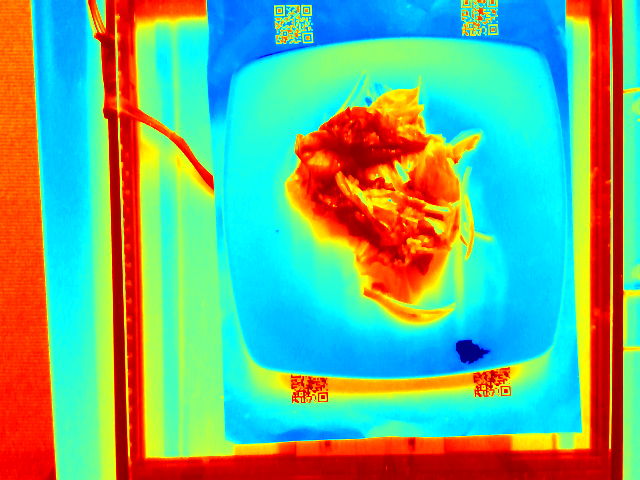

In [ ]:
import cv2
import numpy as np

import cv2
import numpy as np

def to_heatmap(img):
    """
    Converts a normal RGB or grayscale image into a heatmap-style color image.
    """
    if img is None:
        raise ValueError("Image is None. Check your path.")

    # If the image is RGB, convert to grayscale first
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    # Normalize to 0-255
    gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

    colored = cv2.applyColorMap(depth_norm_uint8, cv2.COLORMAP_JET)

    return heatmap


to_heatmap(cv2.imread("/content/rgb.png"))

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gillesokhin/nutrition5k-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'nutrition5k-dataset' dataset.
Path to dataset files: /kaggle/input/nutrition5k-dataset


In [ ]:
!ls /kaggle/input/nutrition5k-dataset

dish_ingredients.csv	   imagery
dish_nutrition_values.csv  ingredients_metadata.csv


In [ ]:
!rm -r /content/content
!rm -r /content/nutrition5k-dataset

In [ ]:
# Model Training
# Importing Torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from transformers import AutoTokenizer, AutoModel

In [ ]:
from transformers import AutoImageProcessor, AutoModel

class DepthEncoder(nn.Module):
    def __init__(self, embed_dim=1024):
        super().__init__()
        # Best monocular depth model that outputs rich embeddings (not just a depth map)
        self.processor = AutoImageProcessor.from_pretrained("LiheYoung/Depth-Anything-V2-Small")
        self.model = AutoModel.from_pretrained("LiheYoung/Depth-Anything-V2-Small")

        # Optional: project to your desired dimension (e.g., match visual/text encoder)
        self.projection = nn.Linear(768, 256) if self.model.config.hidden_size != embed_dim else nn.Identity()

    def forward(self, images):
        # images: PIL or tensor [B, 3, H, W]
        inputs = self.processor(images=images, return_tensors="pt")
        inputs = {k: v.to(self.model.device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = self.model(**inputs, output_hidden_states=True)

        # Use the [CLS] token or mean-pool the last hidden state → semantic depth vector
        if hasattr(outputs, "pooler_output") and outputs.pooler_output is not None:
            feat = outputs.pooler_output
        else:
            feat = outputs.last_hidden_state[:, 0]  # [CLS] token

        return self.projection(feat)  # [B, embed_dim]

In [ ]:
# ===========================
# 2️⃣ Visual feature extractor
# ===========================
class VisualEncoder(nn.Module):
    def __init__(self, pretrained=True, output_dim=256):
        super().__init__()
        self.model = models.efficientnet_b0(pretrained=pretrained)
        self.model.classifier = nn.Identity()  # remove classifier
        self.fc_out = nn.Linear(1280, output_dim)

    def forward(self, x):
        # x: [B, 3, H, W]
        features = self.model(x)
        out = self.fc_out(features)
        return out  # [B, output_dim]


In [ ]:
class TextEncoder(nn.Module):
    def __init__(self, model_name='sentence-transformers/all-MiniLM-L6-v2', output_dim=256):
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name)
        self.fc_out = nn.Linear(self.model.config.hidden_size, output_dim)

    def forward(self, texts):
        # texts: list of strings
        tokens = self.tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
        tokens = {k: v.to(next(self.model.parameters()).device) for k, v in tokens.items()}
        with torch.no_grad():  # freeze pretrained weights
            outputs = self.model(**tokens)
            cls_emb = outputs.last_hidden_state[:,0,:]  # take [CLS] token embedding
        out = self.fc_out(cls_emb)
        return out  # [B, output_dim]


In [ ]:
class MultimodalTransformerHead(nn.Module):
    def __init__(self, input_dim=256, num_modalities=3, transformer_dim=256,
                 nhead=4, num_layers=2, output_dim=20):
        super().__init__()
        self.num_modalities = num_modalities
        # Learnable modality embeddings
        self.modality_emb = nn.Parameter(torch.randn(num_modalities, input_dim))
        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=input_dim, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        # Output MLP
        self.fc_out = nn.Sequential(
            nn.Linear(input_dim, transformer_dim),
            nn.ReLU(),
            nn.Linear(transformer_dim, output_dim)
        )

    def forward(self, depth_feat, visual_feat, text_feat):
        x = torch.stack([depth_feat, visual_feat, text_feat], dim=1)  # [B, 3, D]
        x = x + self.modality_emb.unsqueeze(0)
        x = x.permute(1,0,2)  # [seq_len, B, D]
        x = self.transformer(x)  # [seq_len, B, D]
        x = x.mean(dim=0)       # aggregate sequence -> [B, D]
        out = self.fc_out(x)    # [B, output_dim]
        return out

In [ ]:
class NutritionPredictor(nn.Module):
    def __init__(self, depth_encoder, visual_encoder, text_encoder, transformer_head):
        super().__init__()
        self.depth_encoder = depth_encoder
        self.visual_encoder = visual_encoder
        self.text_encoder = text_encoder
        self.transformer_head = transformer_head

        # Freeze pretrained backbones
        for p in self.depth_encoder.model.parameters(): p.requires_grad=False
        for p in self.visual_encoder.model.parameters(): p.requires_grad=False
        for p in self.text_encoder.model.parameters(): p.requires_grad=False

    def forward(self, depth, image, text):
        depth_feat = self.depth_encoder(depth)
        image_feat = self.visual_encoder(image)
        text_feat = self.text_encoder(text)
        out = self.transformer_head(depth_feat, image_feat, text_feat)
        return out


In [ ]:

# ===========================
# Example usage
# ===========================
device = 'cuda' if torch.cuda.is_available() else 'cpu'

depth_encoder = DepthEncoder(output_dim=256).to(device)
visual_encoder = VisualEncoder(output_dim=256).to(device)
text_encoder = TextEncoder(output_dim=256).to(device)

model = NutritionPredictor(depth_encoder, visual_encoder, text_encoder,
                           fusion_dim=512, output_dim=10).to(device)

# Dummy inputs
depth = torch.randn(2,1,224,224).to(device)
image = torch.randn(2,3,224,224).to(device)
text = ["grilled chicken with salad", "spaghetti with tomato sauce"]

output = model(depth, image, text)
print(output)  # -> [2,10]


tensor([[-0.0197, -0.0489,  0.0486,  0.0454, -0.0056,  0.1319,  0.0552,  0.0217,
          0.0193,  0.0168],
        [ 0.0104, -0.0434,  0.0646,  0.0063, -0.0237,  0.0941,  0.0946,  0.0224,
          0.0189,  0.0368]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [ ]:
!sudo mv  /root/.cache/kagglehub/datasets/gillesokhin/nutrition5k-dataset ./content/nutrition5k-dataset

mv: cannot stat '/root/.cache/kagglehub/datasets/gillesokhin/nutrition5k-dataset': No such file or directory


In [ ]:
import os

destination_path = '/kaggle/input/nutrition5k-dataset'
if not os.path.exists(destination_path):
    os.makedirs(destination_path)
    print(f"Created directory: {destination_path}")
else:
    print(f"Directory already exists: {destination_path}")


Directory already exists: /content/nutrition5k-dataset


In [ ]:
source_path = path # 'path' variable holds the correct Kagglehub download location
!sudo mv "{source_path}" "{destination_path}"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
import pandas as pd
df = pd.read_csv("/kaggle/input/nutrition5k-dataset/dish_ingredients.csv")

In [ ]:
df2 = pd.read_csv("/kaggle/input/nutrition5k-dataset/dish_nutrition_values.csv")

In [ ]:
df2.head()

,dish_id,calories,mass,fat,carb,protein
0,dish_1561662216,300.794281,193.0,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88.0,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292.0,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290.0,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103.0,0.148000,4.625000,0.956000


In [ ]:

all_list = dict()

for dish_id in df['dish_id']:
    if dish_id in all_list:
      continue

    all_list[dish_id] = df[df['dish_id'] == dish_id]['calories'].sum()

print(all_list)

{'dish_1561662216': np.float64(300.794263527), 'dish_1562688426': np.float64(137.57), 'dish_1561662054': np.float64(419.43874853600005), 'dish_1562008979': np.float64(382.93662841500003), 'dish_1560455030': np.float64(20.59), 'dish_1558372433': np.float64(74.36), 'dish_1563379132': np.float64(232.05), 'dish_1565640549': np.float64(45.482907274), 'dish_1563207364': np.float64(309.27), 'dish_1561575474': np.float64(120.05842776799999), 'dish_1550795690': np.float64(68.12), 'dish_1563216717': np.float64(246.00801469200002), 'dish_1565972591': np.float64(195.2), 'dish_1568649312': np.float64(44.46), 'dish_1550876012': np.float64(253.51999999999998), 'dish_1551565034': np.float64(7.79), 'dish_1550860747': np.float64(39.5), 'dish_1566245398': np.float64(506.35535666999994), 'dish_1563381680': np.float64(32.46), 'dish_1562183096': np.float64(41.188979145), 'dish_1563476551': np.float64(1116.391072759), 'dish_1559844951': np.float64(274.336), 'dish_1550778583': np.float64(67.76), 'dish_1562963

In [ ]:
df.head(15)

,dish_id,ingr_id,ingr_name,grams,calories,fat,carb,protein
0,dish_1561662216,ingr_0000000508,soy sauce,3.398568,1.801241,0.020391,0.166530,0.275284
1,dish_1561662216,ingr_0000000122,garlic,2.124105,3.164916,0.010621,0.700955,0.135943
2,dish_1561662216,ingr_0000000026,white rice,8.496420,11.045346,0.025489,2.378998,0.229403
3,dish_1561662216,ingr_0000000524,parsley,0.213397,0.079170,0.001707,0.013657,0.006189
4,dish_1561662216,ingr_0000000094,onions,1.707173,0.682869,0.001707,0.153646,0.018779
5,dish_1561662216,ingr_0000000023,brown rice,68.000000,75.480000,0.612000,15.640000,1.768000
6,dish_1561662216,ingr_0000000189,vinegar,0.853586,0.000000,0.000000,0.000000,0.000000
7,dish_1561662216,ingr_0000000054,apple,4.267931,2.219324,0.008536,0.597510,0.012804
8,dish_1561662216,ingr_0000000029,mixed greens,21.339657,5.975104,0.085359,1.131002,0.469472
9,dish_1561662216,ingr_0000000328,sugar,6.372315,24.724582,0.000000,6.372315,0.000000


In [ ]:

# Group by dish_id
json_list = []
for dish_id, group in df.groupby("dish_id"):
    ingredients_str = ", ".join(map(str, group["ingr_name"].tolist()))
    calories_sum = group["calories"].sum()
    sizes_str = ", ".join([f"{round(g,2)}" for g in group["grams"].tolist()])

    json_list.append({
        "id": dish_id,
        "ingredients": ingredients_str,
        "calories": round(float(calories_sum), 3),
        "size": sizes_str
    })


In [ ]:
len(json_list)

4768

In [ ]:
json_list[27]

{'id': 'dish_1550706891',
 'ingredients': 'scrambled eggs',
 'calories': 150.96,
 'size': '102.0'}

In [ ]:
# generating description for each dish
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# ---- Load small generative model ----
# Qwen2-0.5B-Instruct: Alibaba's fully open tiny model (0.5B params), no permissions/gated access needed
# Excels at concise, natural instruction-following for short text like 5-7 word recipe labels
# Runs super fast on CPU/GPU, perfect for batch processing JSON records
model_name = "Qwen/Qwen2.5-0.5B-Instruct"

print("Loading Qwen2.5-0.5B-Instruct...")
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16,
    trust_remote_code=True
)
model.eval()

device = next(model.parameters()).device

# ---- Updated generation function (keeps your exact name & style) ----
def generate_description_mistral(prompt, max_length=30):
    # Apply Qwen2 chat template for optimal instruction following
    messages = [
        {"role": "system", "content": "You are a helpful assistant that writes concise recipe labels."},
        {"role": "user", "content": prompt}
    ]
    inputs = tokenizer.apply_chat_template(messages, return_tensors="pt", add_generation_prompt=True).to(device)

    outputs = model.generate(
        inputs,
        max_new_tokens=20,           # short output → enforces 5–10 words max
        do_sample=True,
        temperature=0.8,
        top_p=0.9,
        top_k=40,
        repetition_penalty=1.2,
        pad_token_id=tokenizer.eos_token_id
    )

    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    # Extract only the generated response (after the prompt)
    generated = text.split(prompt)[-1].strip()

    # Clean and enforce length (5–7 words ideal)
    words = generated.split()
    if len(words) > 10:
        generated = " ".join(words[:7]) + ("..." if len(words) > 7 else "")

    return generated

Loading Qwen2.5-0.5B-Instruct...


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

In [ ]:

# ---- Generate descriptions for all JSON records ----
i = 0
for record in json_list:
    i += 1
    print("Record: " + str(i) + "/" + str(len(json_list)))
    print("\n")
    ingredients = record.get("ingredients", "")
    prompt = (
        f"Write a short, human-like description of a dish using the following ingredients: "
        f"{ingredients}. Keep it concise (5-7 words), natural language, suitable for a recipe label."
    )
    record["description"] = generate_description_mistral(prompt)
    print("\n")
    print(record["description"])
    print("\n")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Record: 4169/4768




assistant
Bok chowder with crisp bacon and buttery crust.


Record: 4170/4768




assistant Bok choy with olive oil and...


Record: 4171/4768




assistant Salmon with bok choy, olive oil,...


Record: 4172/4768




assistant Salmon and bell peppers stir-fry with...


Record: 4173/4768




assistant
Blueberry-virgin-salad with garlic, mustard, olive oil, raw spinach and


Record: 4174/4768




assistant Garlic-radiadish chicken with green beans and...


Record: 4175/4768




assistant
Mustard-virgin olive salad with blueberry vinaigrette.


Record: 4176/4768




assistant
Blueberry Walnut Walnut Salad with Mustard and Vinegar


Record: 4177/4768




assistant Homemade Hominy Chicken and Pineapple Bowl...


Record: 4178/4768




assistant
Tofu stir-fry with garlic and ginger.


Record: 4179/4768




assistant Blueberry Mustard Tofu Stir-Fry with Garlic...


Record: 4180/4768




assistan

In [ ]:
json_list[32]

{'id': 'dish_1550707236',
 'ingredients': 'bread',
 'calories': 127.392,
 'size': '48.0',
 'description': 'assistant\nBread loaf with jam and cream sauce.'}

In [ ]:
!sudo ls /kaggle/input/nutrition5k-dataset/imagery/

dish_1556572657  dish_1560369403  dish_1562788760  dish_1565370004
dish_1556573514  dish_1560369421  dish_1562788794  dish_1565378680
dish_1556575014  dish_1560370114  dish_1562788816  dish_1565378731
dish_1556575083  dish_1560370137  dish_1562788845  dish_1565378770
dish_1556575124  dish_1560370804  dish_1562789207  dish_1565379251
dish_1556575273  dish_1560370833  dish_1562789240  dish_1565379320
dish_1556575327  dish_1560441247  dish_1562789268  dish_1565379377
dish_1556575386  dish_1560441270  dish_1562789301  dish_1565379788
dish_1556575446  dish_1560441288  dish_1562789328  dish_1565379827
dish_1556575499  dish_1560441311  dish_1562790170  dish_1565379868
dish_1556575558  dish_1560441339  dish_1562790224  dish_1565382733
dish_1556575700  dish_1560441464  dish_1562790259  dish_1565382762
dish_1557853154  dish_1560441487  dish_1562790295  dish_1565382803
dish_1557853229  dish_1560441511  dish_1562790321  dish_1565382833
dish_1557853314  dish_1560441529  dish_1562790775  dish_156538

In [ ]:
get_image_path("dish_1550707236")


'/kaggle/input/nutrition5k-dataset/imagery/realsense_overhead/dish_1550707236/rgb.png'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(get_image_path("dish_1550707236"))

cv2_imshow(img)

AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
tdf[tdf['id'] ==  "dish_1550705445"]

,id,ingredients,calories,size,description
4,dish_1550705445,cucumbers,4.0,40.0,"Cool, crisp cucumber slices. Refreshing bite."


In [ ]:
BASE_IMG_P = "/kaggle/input/nutrition5k-dataset/imagery/realsense_overhead/"
def get_image_path(id):
  return f"{BASE_IMG_P}{str(id)}/rgb.png"


In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as T

class NutritionDatasetNoVocab(Dataset):
    def __init__(self, json_list, num_slots=5, image_size=224):
        """
        json_list: list of dicts with keys 'id', 'ingredients', 'calories', 'size', 'description'
        num_slots: max number of ingredients per dish
        """
        self.data = json_list
        self.num_slots = num_slots

        self.transform = T.Compose([
            T.Resize((image_size, image_size)),
            T.ToTensor()
        ])

    def __len__(self):
        return len(self.data)

    def encode_sizes(self, size_str):
        """Return size as float tensor"""
        sizes = [float(s) for s in size_str.split(", ")]
        vec = torch.zeros(self.num_slots)
        for i, s in enumerate(sizes[:self.num_slots]):
            vec[i] = s
        return vec  # [num_slots]

    def __getitem__(self, idx):
        record = self.data[idx]
        img_path = get_image_path(record['id'])
        img = Image.open(img_path).convert('RGB')
        img_tensor = self.transform(img)
        depth_tensor = img_tensor.clone()  # use same image as depth

        # Text input
        text_input = record['description']

        # Target: calories + sizes only
        calories = torch.tensor([record['calories']], dtype=torch.float32)
        sizes_vec = self.encode_sizes(record['size'])
        target = torch.cat([calories, sizes_vec], dim=0)

        return depth_tensor, img_tensor, text_input, target


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
import os

# -------------------------
# 1. Dataset
# -------------------------
class FoodDataset(Dataset):
    def __init__(self, data_list, ingredient_vocab, transform=None):
        """
        data_list: list of dicts
        ingredient_vocab: dict {ingredient_name: idx}
        """
        self.data = data_list
        self.vocab = ingredient_vocab
        self.transform = transform
        self.max_slots = 20  # max number of ingredients per dish

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        image = Image.open(item['image_path']).convert('RGB')
        if self.transform:
            image = self.transform(image)

        # Ingredients
        ingredient_names = item['ingredients'].split(',')
        ingredient_sizes = item['size'].split(',')

        # pad/truncate to max_slots
        ingredient_idx = [self.vocab.get(ing.strip(), 0) for ing in ingredient_names][:self.max_slots]
        size_values = [float(s.strip()) for s in ingredient_sizes][:self.max_slots]
        n_slots = len(ingredient_idx)

        # Pad to max_slots
        while len(ingredient_idx) < self.max_slots:
            ingredient_idx.append(-1)   # -1 for "no ingredient"
            size_values.append(0.0)

        ingredient_idx = torch.tensor(ingredient_idx, dtype=torch.long)
        size_values = torch.tensor(size_values, dtype=torch.float32)
        calories = torch.tensor(item['calories'], dtype=torch.float32)

        return image, ingredient_idx, size_values, calories

# -------------------------
# 2. Model
# -------------------------
class MultimodalFoodModel(nn.Module):
    def __init__(self, ingredient_vocab_size, embed_dim=256, num_queries=20, num_transformer_layers=3):
        super().__init__()
        self.num_queries = num_queries
        self.embed_dim = embed_dim

        # RGB Vision Encoder
        backbone = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
        modules = list(backbone.children())[:-2]  # remove avgpool + fc
        self.rgb_encoder = nn.Sequential(*modules)
        self.rgb_proj = nn.Conv2d(2048, embed_dim, 1)  # project to embed_dim

        # Depth Encoder (simple CNN, can replace with larger backbone)
        self.depth_encoder = nn.Sequential(
            nn.Conv2d(1, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, embed_dim, 3, stride=2, padding=1),
            nn.ReLU()
        )

        # Multimodal Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=8)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_transformer_layers)

        # Ingredient + size decoder queries
        self.query_embed = nn.Parameter(torch.randn(num_queries, embed_dim))

        # Transformer decoder
        decoder_layer = nn.TransformerDecoderLayer(d_model=embed_dim, nhead=8)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=3)

        # Prediction heads
        self.ingredient_head = nn.Linear(embed_dim, ingredient_vocab_size)
        self.size_head = nn.Linear(embed_dim, 1)
        self.calories_head = nn.Sequential(
            nn.Linear(embed_dim, embed_dim),
            nn.ReLU(),
            nn.Linear(embed_dim, 1)
        )

    def forward(self, rgb_img, depth_map):
        # rgb_img: [B,3,H,W], depth_map: [B,1,H,W]
        B = rgb_img.size(0)

        # ---------------- RGB features ----------------
        rgb_feat = self.rgb_encoder(rgb_img)  # [B,2048,H',W']
        rgb_feat = self.rgb_proj(rgb_feat)    # [B,embed_dim,H',W']
        rgb_feat = rgb_feat.flatten(2).permute(2,0,1)  # [seq_len, B, embed_dim]

        # ---------------- Depth features ----------------
        depth_feat = self.depth_encoder(depth_map)      # [B,embed_dim,H',W']
        depth_feat = depth_feat.flatten(2).permute(2,0,1)  # [seq_len, B, embed_dim]

        # ---------------- Concatenate tokens ----------------
        fused_feat = torch.cat([rgb_feat, depth_feat], dim=0)  # [seq_len_total, B, embed_dim]

        # ---------------- Transformer Encoder ----------------
        enc_feat = self.transformer_encoder(fused_feat)  # [seq_len_total, B, embed_dim]

        # ---------------- Global Pool for Calories ----------------
        global_feat = enc_feat.mean(dim=0)  # [B, embed_dim]
        calories = self.calories_head(global_feat).squeeze(1)  # [B]

        # ---------------- Prepare queries ----------------
        queries = self.query_embed.unsqueeze(1).repeat(1, B, 1)  # [num_queries, B, embed_dim]

        # ---------------- Transformer Decoder ----------------
        dec_out = self.transformer_decoder(queries, enc_feat)   # [num_queries, B, embed_dim]

        # ---------------- Prediction Heads ----------------
        dec_out = dec_out.permute(1,0,2)  # [B,num_queries,embed_dim]
        ingredient_logits = self.ingredient_head(dec_out)      # [B,num_queries,vocab]
        size_preds = self.size_head(dec_out).squeeze(-1)       # [B,num_queries]

        return ingredient_logits, size_preds, calories

# -------------------------
# 3. Training Loop Skeleton
# -------------------------
def train(model, dataloader, optimizer, ingredient_loss_fn, size_loss_fn, calories_loss_fn, device):
    model.train()
    for batch in dataloader:
        rgb, ingredient_idx, size_vals, calories = batch
        rgb = rgb.to(device)
        depth = generate_depth_map(rgb).to(device)  # replace with your depth function
        ingredient_idx = ingredient_idx.to(device)
        size_vals = size_vals.to(device)
        calories = calories.to(device)

        optimizer.zero_grad()
        ing_logits, size_preds, cal_preds = model(rgb, depth)

        # ---------------- Ingredient Loss ----------------
        # multi-label cross entropy with ignore_index=-1
        B, num_queries, V = ing_logits.shape
        ing_logits_flat = ing_logits.view(B*num_queries, V)
        ingredient_idx_flat = ingredient_idx.view(B*num_queries)
        ingredient_loss = ingredient_loss_fn(ing_logits_flat, ingredient_idx_flat)

        # ---------------- Size Loss ----------------
        size_loss = size_loss_fn(size_preds, size_vals)

        # ---------------- Calories Loss ----------------
        calories_loss = calories_loss_fn(cal_preds, calories)

        # ---------------- Total Loss ----------------
        loss = ingredient_loss + size_loss + calories_loss
        loss.backward()
        optimizer.step()

# -------------------------
# 4. Example Usage
# -------------------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

ingredient_vocab = {"rice":0, "chicken":1, "broccoli":2, "no_ingredient":3}  # example
dataset = FoodDataset(data_list, ingredient_vocab, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultimodalFoodModel(ingredient_vocab_size=len(ingredient_vocab)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

ingredient_loss_fn = nn.CrossEntropyLoss(ignore_index=-1)
size_loss_fn = nn.MSELoss()
calories_loss_fn = nn.MSELoss()

# Example training call
# train(model, dataloader, optimizer, ingredient_loss_fn, size_loss_fn, calories_loss_fn, device)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# 1. ResNet Feature Extractor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, resnet_model='resnet50', pretrained=True):
        super().__init__()
        # Load pretrained ResNet
        resnet = getattr(models, resnet_model)(pretrained=pretrained)
        # Remove the fully connected layer
        self.backbone = nn.Sequential(*list(resnet.children())[:-1])  # output: [batch, 2048, 1, 1]

    def forward(self, x):
        features = self.backbone(x)
        features = torch.flatten(features, 1)  # flatten to [batch, feature_dim]
        return features

# 2. EfficientNet Feature Extractor
class EfficientNetFeatureExtractor(nn.Module):
    def __init__(self, efficient_model='efficientnet_b0', pretrained=True):
        super().__init__()
        # Load pretrained EfficientNet
        efficientnet = getattr(models, efficient_model)(pretrained=pretrained)
        # Remove the classifier
        self.backbone = nn.Sequential(*list(efficientnet.children())[:-1])  # output: [batch, 1280, 1, 1] for b0

    def forward(self, x):
        features = self.backbone(x)
        features = torch.flatten(features, 1)  # flatten to [batch, feature_dim]
        return features

# 3. Combined Feature Extractor
class CombinedFeatureExtractor(nn.Module):
    def __init__(self, resnet_model='resnet50', efficient_model='efficientnet_b0', pretrained=True):
        super().__init__()
        self.resnet_extractor = ResNetFeatureExtractor(resnet_model, pretrained)
        self.efficient_extractor = EfficientNetFeatureExtractor(efficient_model, pretrained)

    def forward(self, rgb_image, depth_image):
        # rgb_image -> ResNet, depth_image -> EfficientNet (for example)
        rgb_features = self.resnet_extractor(rgb_image)
        depth_features = self.efficient_extractor(depth_image)
        combined_features = torch.cat([rgb_features, depth_features], dim=1)
        return combined_features

# Example usage
if __name__ == "__main__":
    rgb = torch.randn(2, 3, 224, 224)
    depth = torch.randn(2, 3, 224, 224)  # assuming 3 channels for EfficientNet, can be adapted
    model = CombinedFeatureExtractor()
    out = model(rgb, depth)
    print(out.shape)  # should be [2, 2048+1280] for resnet50 + efficientnet_b0


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 219MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 175MB/s]


torch.Size([2, 3328])


In [ ]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        # Create positional encoding matrix
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # shape: [1, max_len, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x shape: [batch, seq_len, d_model]
        x = x + self.pe[:, :x.size(1)]
        return x

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, seq_len=16, nhead=4, num_layers=2, dim_feedforward=512, dropout=0.1):
        super().__init__()
        self.input_dim = input_dim
        self.seq_len = seq_len
        self.token_dim = input_dim // seq_len  # size of each token embedding

        assert input_dim % seq_len == 0, "input_dim must be divisible by seq_len"

        # Linear to project slices into token_dim
        self.linear_in = nn.Linear(self.token_dim, self.token_dim)

        # Positional encoding
        self.pos_encoder = PositionalEncoding(self.token_dim, max_len=seq_len)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=self.token_dim, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Final regressor
        self.regressor = nn.Linear(self.token_dim, 1)

    def forward(self, x):
        # x shape: [batch, input_dim]
        # reshape to sequence
        batch_size = x.size(0)
        x = x.view(batch_size, self.seq_len, self.token_dim)  # [batch, seq_len, token_dim]
        x = self.linear_in(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)  # [batch, seq_len, token_dim]
        x = x.mean(dim=1)  # global average pooling over sequence
        out = self.regressor(x)  # [batch, 1]
        return out

# Example usage
if __name__ == "__main__":
    # Suppose concatenated vector from ResNet + EfficientNet
    concat_dim = 2048 + 1280  # resnet50 + efficientnet_b0
    batch_size = 2
    dummy_input = torch.randn(batch_size, concat_dim)

    model = TransformerRegressor(input_dim=concat_dim, seq_len=16)
    output = model(dummy_input)
    print(output.shape)  # [2,1]


torch.Size([2, 1])


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch

class Nutrition5KDataset(Dataset):
    def __init__(self, root_dir):
        """
        root_dir: path to /kaggle/input/nutrition5k-dataset/imagery/realsense_overhead
        """
        self.root_dir = root_dir
        self.folders = [os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]


        # Transform for RGB images (ResNet)
        self.rgb_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                                 std=[0.229, 0.224, 0.225])
        ])

        # Transform for Depth images (EfficientNet)
        self.depth_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5],  # depth might not need ImageNet stats
                                 std=[0.5, 0.5, 0.5])
        ])

    def __len__(self):
        return len(self.folders)

    def __getitem__(self, idx):
        folder = self.folders[idx]

        dish_id = folder.split("/")[-1]

        # Load RGB image
        rgb_path = os.path.join(folder, 'rgb.png')
        rgb_image = Image.open(rgb_path).convert('RGB')
        rgb_image = self.rgb_transform(rgb_image)

        # Load Depth image
        depth_path = os.path.join(folder, 'depth_color.png')
        depth_image = Image.open(depth_path).convert('RGB')  # EfficientNet expects 3 channels
        depth_image = self.depth_transform(depth_image)

        return rgb_image, depth_image, dish_id

# Usage
dataset = Nutrition5KDataset('/kaggle/input/nutrition5k-dataset/imagery/realsense_overhead')
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=2)

# Test batch
for rgb_batch, depth_batch, dish_id in dataloader:
    print(rgb_batch.shape)   # [B,3,224,224]
    print(depth_batch.shape) # [B,3,224,224]
    print("Calories: ", [all_list[id] for id in dish_id])
    break


torch.Size([8, 3, 224, 224])
torch.Size([8, 3, 224, 224])


KeyError: 'dish_1574357682'

In [ ]:
# nutrition5k_download_and_dataset.py

import os
import subprocess
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# 1. Download from Google Cloud Storage using gsutil
def download_nutrition5k(overhead_dir, metadata_dir):
    """
    Download the overhead RGB + depth_color images and metadata CSVs from the Nutrition5K GCS bucket.
    """
    # Base GCS path
    bucket = "gs://nutrition5k_dataset/nutrition5k_dataset"

    # Paths in the bucket we want
    overhead_path = f"{bucket}/imagery/realsense_overhead"
    metadata1 = f"{bucket}/metadata/dish_metadata_cafe1.csv"
    metadata2 = f"{bucket}/metadata/dish_metadata_cafe2.csv"
    splits = f"{bucket}/dish_ids/splits"

    # Make local dirs
    os.makedirs(overhead_dir, exist_ok=True)
    os.makedirs(metadata_dir, exist_ok=True)

    # Download overhead images (all subfolders)
    cmd_overhead = [
        "gsutil", "-m", "cp", "-r",
        f"{overhead_path}", overhead_dir
    ]
    print("Running:", " ".join(cmd_overhead))
    subprocess.run(cmd_overhead, check=True)

    # Download metadata CSVs
    for meta in [metadata1, metadata2]:
        cmd = ["gsutil", "cp", meta, metadata_dir]
        print("Running:", " ".join(cmd))
        subprocess.run(cmd, check=True)

    # Download splits (train/test ids)
    cmd_splits = ["gsutil", "-m", "cp", "-r", splits, metadata_dir]
    print("Running:", " ".join(cmd_splits))
    subprocess.run(cmd_splits, check=True)


# 4. Main execution (e.g. in a Kaggle / Colab environment)

# Local directories where you'll store the downloaded data
overhead_local = "/content/nutrition5k_overhead"
metadata_local = "/content/nutrition5k_metadata"

# Step 1: download
download_nutrition5k(overhead_local, metadata_local)



In [ ]:


# 2. PyTorch Dataset
class Nutrition5KCalorieDataset(Dataset):
    def __init__(self, imagery_dir, metadata_csv):
        self.imagery_dir = imagery_dir
        dish_calories_map1 = parse_dish_metadata(file_path1)
        dish_calories_map2 = parse_dish_metadata(file_path2)
        cal_per_dish = {**dish_calories_map1, **dish_calories_map2}

        # Map dish_id → calories
        self.id_to_cal = cal_per_dish

        self.dish_ids = [d for d in os.listdir(imagery_dir) if os.path.isdir(os.path.join(imagery_dir, d))]
        self.dish_ids.sort()
        # Transforms here...
        self.rgb_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
        self.depth_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.5, 0.5, 0.5])
        ])
    def __len__(self):
        return len(self.dish_ids)

    def __getitem__(self, idx):
        dish_id = self.dish_ids[idx]
        folder = os.path.join(self.imagery_dir, dish_id)
        rgb = Image.open(os.path.join(folder, "rgb.png")).convert("RGB")
        depth = Image.open(os.path.join(folder, "depth_color.png")).convert("RGB")
        rgb = self.rgb_transform(rgb)
        depth = self.depth_transform(depth)
        calories = float(self.id_to_cal[dish_id])
        return {"rgb": rgb, "depth": depth, "calories": calories, "dish_id": dish_id}

# 3. Putting it all together
def create_dataloader(imagery_dir, metadata_csv, batch_size=8, shuffle=True, num_workers=2):
    dataset = Nutrition5KCalorieDataset(imagery_dir, metadata_csv)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
    return dataloader


dataloader = create_dataloader(overhead_local+ "/realsense_overhead", metadata_csv_path, batch_size=16)

for batch in dataloader:
    print("RGB batch shape:", batch["rgb"].shape)
    print("Depth batch shape:", batch["depth"].shape)
    print("Calories:", batch["calories"])
    print("Dish IDs:", batch["dish_id"])
    break

RGB batch shape: torch.Size([16, 3, 224, 224])
Depth batch shape: torch.Size([16, 3, 224, 224])
Calories: tensor([264.0959, 313.0800, 103.7010,   0.0000, 462.0570,  26.7300, 265.6627,
         49.7678,   0.0000,   0.0000, 300.7789,   0.0000, 222.7780, 539.8647,
        504.4000, 372.0700], dtype=torch.float64)
Dish IDs: ['dish_1561746912', 'dish_1560444785', 'dish_1564777933', 'dish_1572279989', 'dish_1561481634', 'dish_1559060055', 'dish_1562785159', 'dish_1564073641', 'dish_1573579635', 'dish_1572462136', 'dish_1566851616', 'dish_1576171157', 'dish_1558636980', 'dish_1565036922', 'dish_1565811091', 'dish_1563207406']


In [ ]:
import os

def parse_dish_metadata(file_path):
    """
    Returns a dict: dish_id -> total_calories
    """
    dish_to_calories = {}
    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split(",")
            dish_id = parts[0]
            total_calories = float(parts[1])  # 2nd field is calories
            dish_to_calories[dish_id] = total_calories
    return dish_to_calories

# Example usage
file_path1 = "/content/nutrition5k_metadata/dish_metadata_cafe1.csv"

file_path2 = "/content/nutrition5k_metadata/dish_metadata_cafe2.csv"

dish_calories_map1 = parse_dish_metadata(file_path1)
dish_calories_map2 = parse_dish_metadata(file_path2)
cal_per_dish = {**dish_calories_map1, **dish_calories_map2}

len(cal_per_dish)

5006

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
from tqdm import tqdm
from PIL import Image
import torchvision.transforms as transforms
import os

# --- Positional Encoding ---
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return x

# --- Transformer Regressor ---
class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, seq_len=16, nhead=4, num_layers=2, dim_feedforward=512, dropout=0.1):
        super().__init__()
        self.input_dim = input_dim
        self.seq_len = seq_len
        self.token_dim = input_dim // seq_len
        assert input_dim % seq_len == 0, "input_dim must be divisible by seq_len"
        self.linear_in = nn.Linear(self.token_dim, self.token_dim)
        self.pos_encoder = PositionalEncoding(self.token_dim, max_len=seq_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=self.token_dim, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Linear(self.token_dim, 1)

    def forward(self, x):
        batch_size = x.size(0)
        x = x.view(batch_size, self.seq_len, self.token_dim)
        x = self.linear_in(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        out = self.regressor(x)
        return out

# --- Nutrition Model ---
class NutritionModel(nn.Module):
    def __init__(self, seq_len=16, device='cuda'):
        super().__init__()
        self.device = device

        # Pretrained feature extractors
        self.rgb_model = models.resnet50(pretrained=True)
        self.rgb_model = nn.Sequential(*list(self.rgb_model.children())[:-1])  # remove fc
        self.depth_model = models.efficientnet_b0(pretrained=True)
        self.depth_model = nn.Sequential(*list(self.depth_model.children())[:-1])

        self.rgb_dim = 2048
        self.depth_dim = 1280
        self.concat_dim = self.rgb_dim + self.depth_dim

        self.transformer = TransformerRegressor(input_dim=self.concat_dim, seq_len=seq_len)

        for param in self.rgb_model.parameters():
            param.requires_grad = False
        for param in self.depth_model.parameters():
            param.requires_grad = False
    def forward(self, rgb, depth):
        # Feature extraction
        rgb_feat = self.rgb_model(rgb).flatten(1)
        depth_feat = self.depth_model(depth).flatten(1)
        concat = torch.cat([rgb_feat, depth_feat], dim=1)
        out = self.transformer(concat)
        return out.squeeze(1)

# --- Dataset Parser for Calories ---
def parse_dish_metadata(file_path):
    dish_to_calories = {}
    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split(",")
            dish_id = parts[0]
            total_calories = float(parts[1])
            dish_to_calories[dish_id] = total_calories
    return dish_to_calories

# --- PyTorch Dataset ---
from torch.utils.data import Dataset
class Nutrition5KCalorieDataset(Dataset):
    def __init__(self, imagery_dir):
        self.imagery_dir = imagery_dir
        dish_calories_map1 = parse_dish_metadata(file_path1)
        dish_calories_map2 = parse_dish_metadata(file_path2)
        cal_per_dish = {**dish_calories_map1, **dish_calories_map2}

        # Map dish_id → calories
        self.id_to_cal = cal_per_dish

        self.dish_ids = [d for d in os.listdir(imagery_dir) if os.path.isdir(os.path.join(imagery_dir, d))]
        self.dish_ids.sort()

        self.rgb_transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
        ])
        self.depth_transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
        ])

    def __len__(self):
        return len(self.dish_ids)

    def __getitem__(self, idx):
        dish_id = self.dish_ids[idx]
        folder = os.path.join(self.imagery_dir, dish_id)
        rgb = Image.open(os.path.join(folder, "rgb.png")).convert("RGB")
        depth = Image.open(os.path.join(folder, "depth_color.png")).convert("RGB")
        rgb = self.rgb_transform(rgb)
        depth = self.depth_transform(depth)
        calories = float(self.id_to_cal[dish_id])
        calories = torch.tensor(calories, dtype=torch.float32)
        return {"rgb": rgb, "depth": depth, "calories": calories, "dish_id": dish_id}

# --- Training Loop ---


Training on cuda for 50 epochs...



Epoch [1/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.02it/s, loss=0.938]


Epoch 1/50 | Train Loss: 2.8570 | Val Loss: 2.7901
  -> New best model saved! (val_loss: 2.7901)



Epoch [2/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.02it/s, loss=0.827]


Epoch 2/50 | Train Loss: 1.6891 | Val Loss: 0.7798
  -> New best model saved! (val_loss: 0.7798)



Epoch [3/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.09it/s, loss=0.662]


Epoch 3/50 | Train Loss: 0.9350 | Val Loss: 0.7893


Epoch [4/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.04it/s, loss=1.75]


Epoch 4/50 | Train Loss: 0.8615 | Val Loss: 0.6920
  -> New best model saved! (val_loss: 0.6920)



Epoch [5/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.01it/s, loss=0.0926]


Epoch 5/50 | Train Loss: 0.7609 | Val Loss: 0.7045


Epoch [6/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.10it/s, loss=1.18]


Epoch 6/50 | Train Loss: 0.6626 | Val Loss: 0.5886
  -> New best model saved! (val_loss: 0.5886)



Epoch [7/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.08it/s, loss=0.438]


Epoch 7/50 | Train Loss: 0.6017 | Val Loss: 0.5610
  -> New best model saved! (val_loss: 0.5610)



Epoch [8/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.05it/s, loss=0.0698]


Epoch 8/50 | Train Loss: 0.6128 | Val Loss: 0.5348
  -> New best model saved! (val_loss: 0.5348)



Epoch [9/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.04it/s, loss=0.353]


Epoch 9/50 | Train Loss: 0.5646 | Val Loss: 0.5219
  -> New best model saved! (val_loss: 0.5219)



Epoch [10/50] Train: 100%|██████████| 349/349 [00:39<00:00,  8.91it/s, loss=0.37]


Epoch 10/50 | Train Loss: 0.5654 | Val Loss: 0.5854


Epoch [11/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.05it/s, loss=0.233]


Epoch 11/50 | Train Loss: 0.5087 | Val Loss: 0.5382


Epoch [12/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.07it/s, loss=0.178]


Epoch 12/50 | Train Loss: 0.4826 | Val Loss: 0.5053
  -> New best model saved! (val_loss: 0.5053)



Epoch [13/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.99it/s, loss=0.819]


Epoch 13/50 | Train Loss: 0.5035 | Val Loss: 0.4887
  -> New best model saved! (val_loss: 0.4887)



Epoch [14/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.05it/s, loss=0.363]


Epoch 14/50 | Train Loss: 0.4701 | Val Loss: 0.4677
  -> New best model saved! (val_loss: 0.4677)



Epoch [15/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.09it/s, loss=0.237]


Epoch 15/50 | Train Loss: 0.4891 | Val Loss: 0.4860


Epoch [16/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.04it/s, loss=0.0513]


Epoch 16/50 | Train Loss: 0.4435 | Val Loss: 0.5087


Epoch [17/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.05it/s, loss=0.502]


Epoch 17/50 | Train Loss: 0.4375 | Val Loss: 0.4468
  -> New best model saved! (val_loss: 0.4468)



Epoch [18/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.06it/s, loss=0.0915]


Epoch 18/50 | Train Loss: 0.4539 | Val Loss: 0.4224
  -> New best model saved! (val_loss: 0.4224)



Epoch [19/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.03it/s, loss=0.524]


Epoch 19/50 | Train Loss: 0.4229 | Val Loss: 0.4048
  -> New best model saved! (val_loss: 0.4048)



Epoch [20/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.95it/s, loss=0.43]


Epoch 20/50 | Train Loss: 0.4123 | Val Loss: 0.4373


Epoch [21/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.09it/s, loss=0.226]


Epoch 21/50 | Train Loss: 0.3961 | Val Loss: 0.4251


Epoch [22/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.07it/s, loss=0.18]


Epoch 22/50 | Train Loss: 0.3903 | Val Loss: 0.5350


Epoch [23/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.99it/s, loss=0.132]


Epoch 23/50 | Train Loss: 0.3681 | Val Loss: 0.4010
  -> New best model saved! (val_loss: 0.4010)



Epoch [24/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.95it/s, loss=0.297]


Epoch 24/50 | Train Loss: 0.3863 | Val Loss: 0.4599


Epoch [25/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.01it/s, loss=0.224]


Epoch 25/50 | Train Loss: 0.3674 | Val Loss: 0.4167


Epoch [26/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.03it/s, loss=0.221]


Epoch 26/50 | Train Loss: 0.3626 | Val Loss: 0.3992
  -> New best model saved! (val_loss: 0.3992)



Epoch [27/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.04it/s, loss=0.647]


Epoch 27/50 | Train Loss: 0.3600 | Val Loss: 0.4010


Epoch [28/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.04it/s, loss=0.236]


Epoch 28/50 | Train Loss: 0.3628 | Val Loss: 0.4431


Epoch [29/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.98it/s, loss=0.462]


Epoch 29/50 | Train Loss: 0.3500 | Val Loss: 0.3951
  -> New best model saved! (val_loss: 0.3951)



Epoch [30/50] Train: 100%|██████████| 349/349 [00:39<00:00,  8.94it/s, loss=0.181]


Epoch 30/50 | Train Loss: 0.3468 | Val Loss: 0.3535
  -> New best model saved! (val_loss: 0.3535)



Epoch [31/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.08it/s, loss=1.3]


Epoch 31/50 | Train Loss: 0.3316 | Val Loss: 0.3554


Epoch [32/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.05it/s, loss=0.145]


Epoch 32/50 | Train Loss: 0.3244 | Val Loss: 0.3515
  -> New best model saved! (val_loss: 0.3515)



Epoch [33/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.05it/s, loss=0.17]


Epoch 33/50 | Train Loss: 0.3184 | Val Loss: 0.3468
  -> New best model saved! (val_loss: 0.3468)



Epoch [34/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.02it/s, loss=0.213]


Epoch 34/50 | Train Loss: 0.3128 | Val Loss: 0.3493


Epoch [35/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.02it/s, loss=0.158]


Epoch 35/50 | Train Loss: 0.2965 | Val Loss: 0.3798


Epoch [36/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.03it/s, loss=0.249]


Epoch 36/50 | Train Loss: 0.2995 | Val Loss: 0.3410
  -> New best model saved! (val_loss: 0.3410)



Epoch [37/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.04it/s, loss=0.155]


Epoch 37/50 | Train Loss: 0.2983 | Val Loss: 0.3755


Epoch [38/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.01it/s, loss=0.212]


Epoch 38/50 | Train Loss: 0.3070 | Val Loss: 0.3853


Epoch [39/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.99it/s, loss=0.215]


Epoch 39/50 | Train Loss: 0.2982 | Val Loss: 0.3979


Epoch [40/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.99it/s, loss=0.43]


Epoch 40/50 | Train Loss: 0.2953 | Val Loss: 0.3527


Epoch [41/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.08it/s, loss=0.0735]


Epoch 41/50 | Train Loss: 0.2766 | Val Loss: 0.3750


Epoch [42/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.99it/s, loss=0.23]


Epoch 42/50 | Train Loss: 0.2821 | Val Loss: 0.3736


Epoch [43/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.03it/s, loss=0.142]


Epoch 43/50 | Train Loss: 0.2644 | Val Loss: 0.3165
  -> New best model saved! (val_loss: 0.3165)



Epoch [44/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.03it/s, loss=0.0879]


Epoch 44/50 | Train Loss: 0.2702 | Val Loss: 0.3187


Epoch [45/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.03it/s, loss=0.0361]


Epoch 45/50 | Train Loss: 0.2786 | Val Loss: 0.3262


Epoch [46/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.96it/s, loss=0.146]


Epoch 46/50 | Train Loss: 0.2589 | Val Loss: 0.3843


Epoch [47/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.03it/s, loss=0.12]


Epoch 47/50 | Train Loss: 0.2476 | Val Loss: 0.3373


Epoch [48/50] Train: 100%|██████████| 349/349 [00:38<00:00,  9.04it/s, loss=0.182]


Epoch 48/50 | Train Loss: 0.2516 | Val Loss: 0.3498


Epoch [49/50] Train: 100%|██████████| 349/349 [00:39<00:00,  8.90it/s, loss=0.321]


Epoch 49/50 | Train Loss: 0.2516 | Val Loss: 0.3766


Epoch [50/50] Train: 100%|██████████| 349/349 [00:38<00:00,  8.97it/s, loss=0.185]


Epoch 50/50 | Train Loss: 0.2523 | Val Loss: 0.3110
  -> New best model saved! (val_loss: 0.3110)


Training finished! Best validation loss: 0.3110 at epoch 50


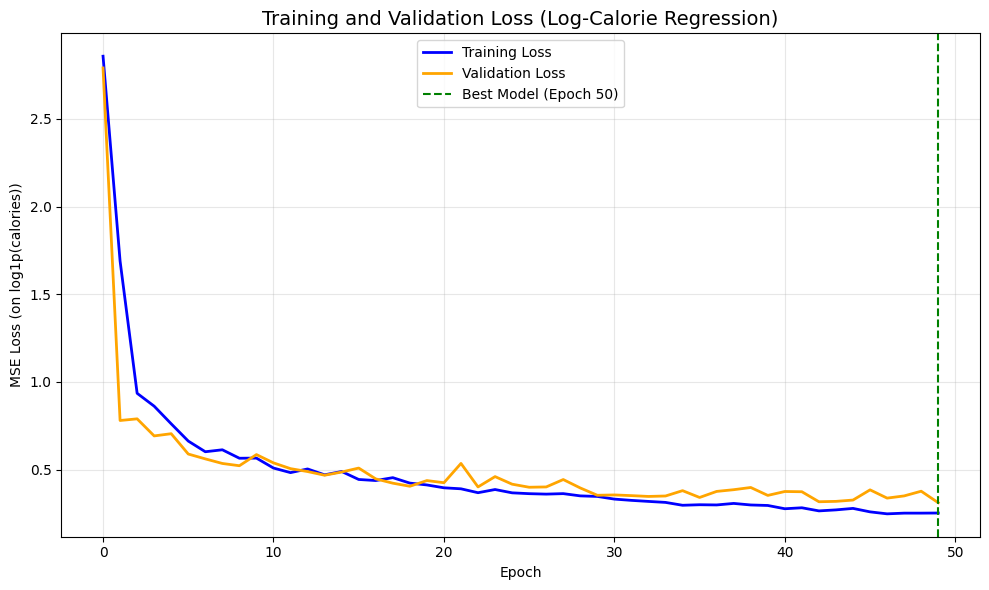

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# -----------------------------
# Your dataset & model (assuming already defined)
# -----------------------------
imagery_dir = "/content/nutrition5k_overhead/realsense_overhead"
dataset = Nutrition5KCalorieDataset(imagery_dir)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=8, shuffle=False, num_workers=2, pin_memory=True)

# Model, device, optimizer
model = NutritionModel(seq_len=16)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()  # Using MSE on log1p(calories)

# -----------------------------
# Lists to store losses for plotting
# -----------------------------
train_losses = []
val_losses   = []
best_val_loss = float('inf')
best_epoch = 0

epochs = 50  # increase if needed

print(f"Training on {device} for {epochs} epochs...\n")

for epoch in range(epochs):
    # ---------------- Training ----------------
    model.train()
    train_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}] Train")

    for batch in loop:
        rgb    = batch["rgb"].to(device, non_blocking=True)
        depth  = batch["depth"].to(device, non_blocking=True)

        # Correct: use torch.log1p on tensor (not np.log1p)
        target = torch.log1p(batch["calories"]).to(device, non_blocking=True)

        optimizer.zero_grad()
        pred = model(rgb, depth).squeeze(-1)  # ensure shape matches
        loss = criterion(pred, target)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # ---------------- Validation ----------------
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            rgb    = batch["rgb"].to(device, non_blocking=True)
            depth  = batch["depth"].to(device, non_blocking=True)
            target = torch.log1p(batch["calories"]).to(device, non_blocking=True)

            pred = model(rgb, depth).squeeze(-1)
            loss = criterion(pred, target)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # ---------------- Logging & Checkpointing ----------------
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_loss': avg_val_loss,
        }, "best_nutrition_model.pth")
        print(f"  -> New best model saved! (val_loss: {avg_val_loss:.4f})\n")

print(f"\nTraining finished! Best validation loss: {best_val_loss:.4f} at epoch {best_epoch}")

# -----------------------------
# Plot Training & Validation Loss
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss", color="blue", linewidth=2)
plt.plot(val_losses,   label="Validation Loss", color="orange", linewidth=2)
plt.axvline(x=best_epoch-1, color="green", linestyle="--", label=f"Best Model (Epoch {best_epoch})")

plt.title("Training and Validation Loss (Log-Calorie Regression)", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss (on log1p(calories))")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
!cp best_nutrition_model.pth "/content/drive/MyDrive/best_cal_pred_from_photo.pth"

In [ ]:
!du -h best_nutrition_model.pth

116M	best_nutrition_model.pth


In [ ]:
class NutritionModel2(nn.Module):
    def __init__(self, device='cuda'):
        super().__init__()
        self.device = device

        # RGB backbone: ResNet18
        self.rgb_model = models.resnet18(pretrained=True)
        self.rgb_model = nn.Sequential(*list(self.rgb_model.children())[:-1])
        self.rgb_dim = 512

        # Depth backbone: EfficientNetB0 modified for 1 channel
        self.depth_model = models.efficientnet_b0(pretrained=True)
        # Modify first conv to 1 channel
        self.depth_model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
        self.depth_model = nn.Sequential(*list(self.depth_model.children())[:-1])
        self.depth_dim = 1280

        self.concat_dim = self.rgb_dim + self.depth_dim

        # Fully connected regressor instead of transformer
        self.regressor = nn.Sequential(
            nn.Linear(self.concat_dim, 1024),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 1)
        )

    def forward(self, rgb, depth):
        rgb_feat = self.rgb_model(rgb).flatten(1)
        depth_feat = self.depth_model(depth).flatten(1)
        concat = torch.cat([rgb_feat, depth_feat], dim=1)
        out = self.regressor(concat)
        return out.squeeze(1)

# --- Training Loop ---
def train_model(model, train_loader, val_loader, epochs=5, lr=1e-4, device='cuda'):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}] Train")
        for batch in loop:
            rgb = batch["rgb"].to(device)
            depth = batch["depth"].to(device)
            calories = batch["calories"].to(device).float()

            optimizer.zero_grad()
            pred = model(rgb, depth)
            loss = criterion(pred, calories)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            loop.set_postfix(loss=train_loss/((loop.n+1)))

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                rgb = batch["rgb"].to(device)
                depth = batch["depth"].to(device)
                calories = batch["calories"].to(device).float()
                pred = model(rgb, depth)
                loss = criterion(pred, calories)
                val_loss += loss.item()
        print(f"Epoch {epoch+1}: Train Loss={train_loss/len(train_loader):.4f}, Val Loss={val_loss/len(val_loader):.4f}")


model2 = NutritionModel2()
train_model(model2, train_loader, val_loader, epochs=5, lr=1e-4, device='cuda')


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch [1/5] Train:   0%|          | 0/349 [00:00<?, ?it/s]


RuntimeError: Given groups=1, weight of size [32, 1, 3, 3], expected input[8, 3, 224, 224] to have 1 channels, but got 3 channels instead

In [ ]:
def cal_from_image(image):
  model